In [1]:
from astropy.io import fits
from astropy.table import Table
import astropy.table as table

import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib

from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel
from astropy.utils.data import get_pkg_data_filename

from astropy.coordinates import SkyCoord

In [2]:
#Make a histogram of proper motions from the Orion star-forming region

In [3]:
filename = 'C:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\Data\\ch4_merged_clean.fits'
hdu = fits.open(filename)[0]
hdu.header['CTYPE1']='RA---TAN-SIP'
hdu.header['CTYPE2']='DEC--TAN-SIP'
wcs = WCS(hdu.header)

gaiaHDU = fits.open('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//Data/gaiadr2_OrionTables.fits')
gTab=Table(gaiaHDU[1].data)

gaiaConfHDU = fits.open('c:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\Data\\conf_in_gaiadr2_oriontables.fits')
gaiaConfTab = Table(gaiaConfHDU[1].data)
Mg_all = np.array([G + 5 - 5*(np.log10(1000/p)) for G, p in zip(gaiaConfTab['phot_g_mean_mag'], gaiaConfTab['parallax'])])
ii=[]
for i in range(len(gaiaConfTab)):
    if( (Mg_all[i]<2.46*(gaiaConfTab['bp_rp'][i])+2.76 and .3<(gaiaConfTab['bp_rp'][i])<1.8)
       or (Mg_all[i]<2.8*(gaiaConfTab['bp_rp'][i])+2.16 and 1.8<(gaiaConfTab['bp_rp'][i]))):
        ii.append(i)
gaiaConfTab = gaiaConfTab[ii]

confTab = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//Data/oriona-allmembers.fits')

wTrap = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//data/wTrap.fits')
wOB = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//data/wOB.fits')
wOther = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//data/wElse.fits')


OBTab = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//data/ob_ori.fits')

masterHDU = fits.open('C://users//sahal//2018TrinaryWork//TrinaryStarSearch/Data//masterconfirmedtable_1.fits')
mTab = Table(masterHDU[1].data)

thOriA = SkyCoord('5h35m15.8290940s','-05d23m14.153141s', frame = 'icrs')
thOriB = SkyCoord('05h35m16.112s','-05d23 m06.89s', frame = 'icrs')
thOriC = SkyCoord('05h35m16.46375s', '-05d23m22.8486s', frame = 'icrs')
thOriD = SkyCoord('05h35m17.19248s', '-05d23m15.5661s', frame = 'icrs')
traptab = Table([[thOriA.ra.deg,thOriB.ra.deg, thOriC.ra.deg, thOriD.ra.deg],
                [thOriA.dec.deg, thOriB.dec.deg,thOriC.dec.deg, thOriD.dec.deg],
                [1.81,-.9,-4.13,-7.11],[-1.62,.1,6.82,8.29]],
               names =('ra','dec','pmra','pmdec'))

In [4]:
avgPmra = np.mean(gaiaConfTab['pmra'])
avgPmdec = np.mean(gaiaConfTab['pmdec'])

trapRa = np.mean(traptab['ra'])
trapDec = np.mean(traptab['dec'])

In [5]:
pmra_corr = gaiaConfTab['pmra']-avgPmra
pmdec_corr = gaiaConfTab['pmdec']-avgPmdec

ra_pos = (gaiaConfTab['ra_1']-trapRa)
dec_pos = (gaiaConfTab['dec_1']-trapDec)

ctheta = []
for i in range(len(gaiaConfTab)):
    posVec = np.array([ra_pos[i], dec_pos[i]])
    pmVec = np.array([pmra_corr[i], pmdec_corr[i]])
    cth = np.dot(posVec, pmVec) / (np.sqrt(np.dot(posVec, posVec))*np.sqrt(np.dot(pmVec,pmVec)))
    ctheta.append(cth)
theta = np.arccos(np.array(ctheta))*180/np.pi

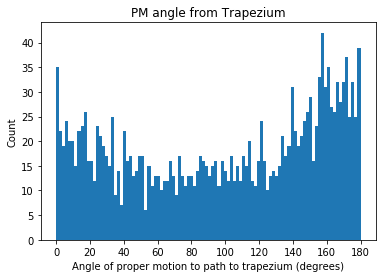

In [6]:
plt.hist(theta, bins = 100, range = (0,180))
plt.title('PM angle from Trapezium')
plt.xlabel('Angle of proper motion to path to trapezium (degrees)')
plt.ylabel('Count')
plt.xticks(np.linspace(0,180,10))
plt.show()

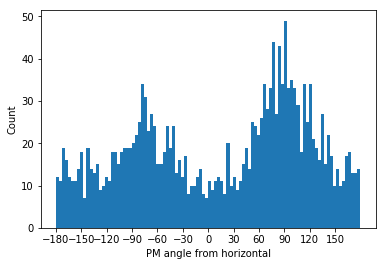

In [7]:
plt.hist(np.arctan2(pmdec_corr, pmra_corr)*180/np.pi,bins = 100)
plt.xlabel('PM angle from horizontal')
plt.ylabel('Count')
plt.xticks(range(-180, 180, 30))
plt.show()

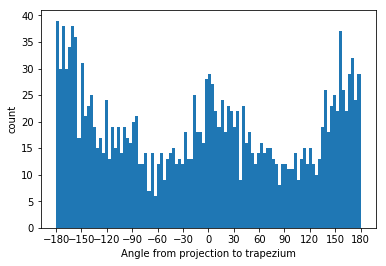

In [8]:
phi = np.arctan2(dec_pos, ra_pos)
theta = np.arctan2(pmdec_corr, pmra_corr)
offAngle = (theta - phi)*180/np.pi
cc = np.where(np.abs(offAngle) > 180)
for n in cc:
    offAngle[n]=offAngle[n] - np.sign(offAngle[n])*360
plt.hist(offAngle, bins = 100)
plt.xticks(range(-180, 181, 30))
plt.xlabel('Angle from projection to trapezium')
plt.ylabel('count')
plt.show()

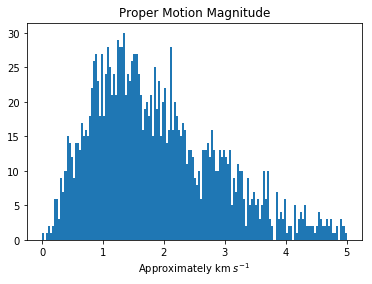

In [9]:
plt.hist(np.sqrt(pmra_corr**2 +pmdec_corr**2)*2, bins = 150,range = (0,5))
plt.title('Proper Motion Magnitude')
plt.xlabel('Approximately km $s^{-1}$')
plt.show()

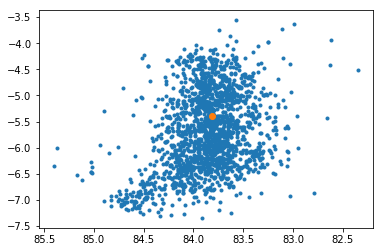

In [10]:
plt.plot(gaiaConfTab['ra_1'], gaiaConfTab['dec_1'],'.')
a,b= plt.xlim()
plt.xlim(b,a)
plt.plot(trapRa, trapDec, 'o')

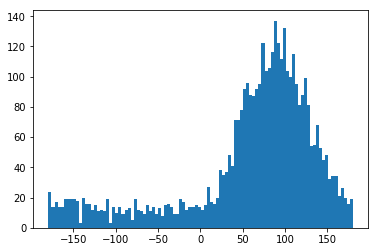

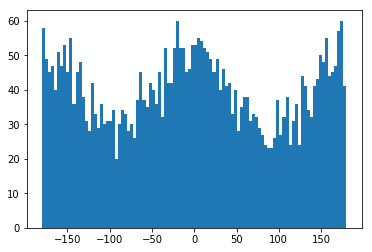

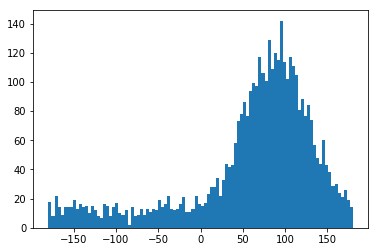

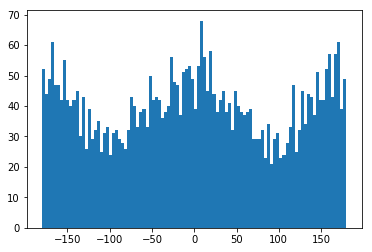

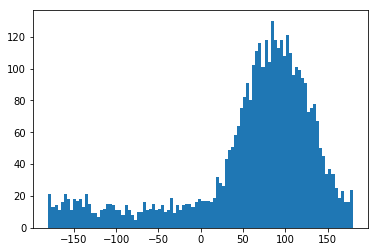

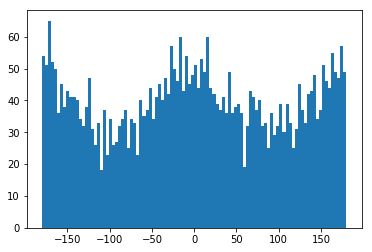

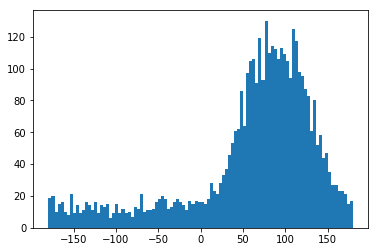

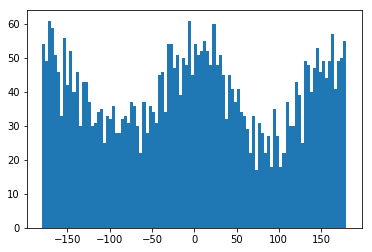

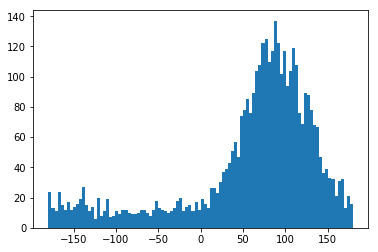

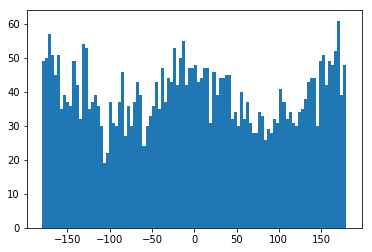

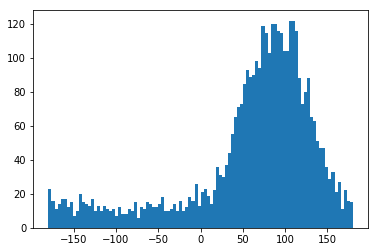

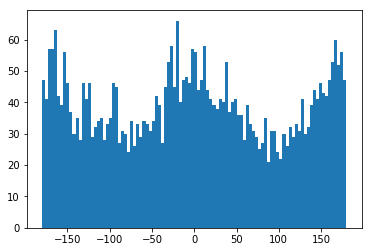

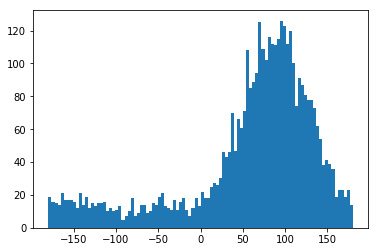

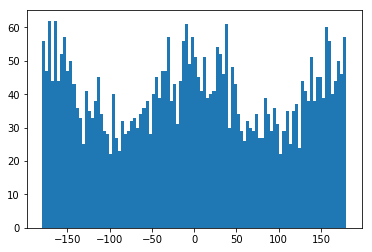

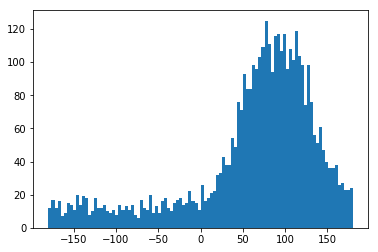

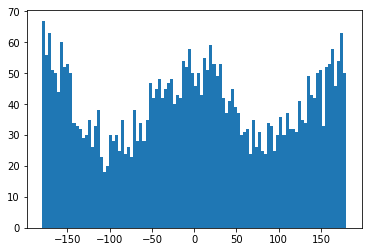

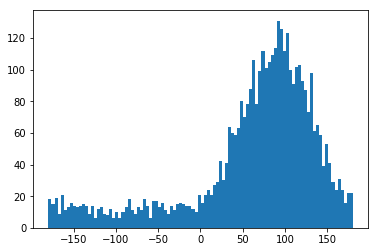

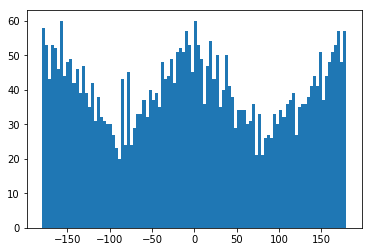

In [11]:
base_fname = 'c:\\users\\sahal\\2018trinarywork\\trinarystarsearch\\data\\syntheticdata\\fake'
for i in range(9):
    end = i + 1
    name = base_fname + str(end) + '.fits'
    ftab = Table.read(name)
#     plt.plot(ftab['RA'], ftab['DEC'], '.')
#     a,b= plt.xlim()
#     plt.xlim(b,a)
#     plt.show()
    theta = np.arctan2(ftab['PMRA'],ftab['PMDEC']) * 180/np.pi
    plt.hist(theta, bins = 100)
    plt.show()
    
    centerRa = np.mean(ftab['RA'])
    centerDec = np.mean(ftab['DEC'])
    posRa = ftab['RA']-centerRa
    posDec = ftab['DEC']-centerDec
    phi = np.arctan2(posDec, posRa)*180/np.pi
    
    angle = theta - phi
    cc = np.where(np.abs(angle)>180)
    for n in cc:
        angle[cc]=angle[cc]-np.sign(angle[cc])*360
    plt.hist(angle, bins = 100)
    plt.show()

In [12]:
mTab

RA_1,DEC_1,Confirmed,source_id,designation_1,ra_2,dec_2,l,b,ecl_lon,ecl_lat,parallax,pmra,pmdec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,ra_error,dec_error,parallax_error,pmra_error,pmdec_error,a_g_percentile_lower,a_g_percentile_upper,a_g_val,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_gof_al,astrometric_matched_observations,astrometric_n_bad_obs_al,astrometric_n_good_obs_al,astrometric_n_obs_ac,astrometric_n_obs_al,astrometric_params_solved,astrometric_primary_flag,astrometric_pseudo_colour,astrometric_pseudo_colour_error,astrometric_sigma5d_max,astrometric_weight_al,bp_g,bp_rp,dec_parallax_corr,dec_pmdec_corr,dec_pmra_corr,duplicated_source,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,e_bp_min_rp_val,flame_flags,frame_rotator_object_type,g_rp,lum_percentile_lower,lum_percentile_upper,lum_val,matched_observations,mean_varpi_factor_al,parallax_over_error,parallax_pmdec_corr,parallax_pmra_corr,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_n_obs,phot_bp_rp_excess_factor,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_n_obs,phot_proc_mode,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_n_obs,phot_variable_flag,pmra_pmdec_corr,priam_flags,ra_dec_corr,radial_velocity,radial_velocity_error,radius_percentile_lower,radius_percentile_upper,radius_val,random_index,ra_parallax_corr,ra_pmdec_corr,ra_pmra_corr,ref_epoch,rv_nb_transits,rv_template_fe_h,rv_template_logg,rv_template_teff,solution_id,teff_percentile_lower,teff_percentile_upper,teff_val,visibility_periods_used,Separation,designation_2,TrapSource,designation_1a,OBSource,designation_2a,OtherHighPMSource
float64,float64,str37,int64,str28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float32,float32,float32,float32,float64,float64,float32,int16,int32,int32,int32,int32,int16,int16,float64,float64,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,int64,int32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float64,float64,float32,int32,float32,float64,float64,float32,int32,int16,float64,float64,float32,int32,str13,float32,int64,float32,float64,float64,float32,float32,float32,int64,float32,float32,float32,float64,int32,float32,float32,float32,int64,float32,float32,float32,int16,float64,str28,bool,str28,bool,str28,bool
83.58733367919922,-4.569249153137207,1,3209630542068274432,Gaia DR2 3209630542068274432,83.58734046516747,-4.569261708471048,208.12546818554333,-19.21642544464745,82.76639185768039,-27.84766281789834,2.9011805707492804,1.254858349568942,-0.5199801427691875,14.326192,15.254836,13.363756,0.023169523819106298,0.02547296628875008,0.03378597014157415,0.055332927434693126,0.051776608623299365,nan,nan,nan,292.0293,0.12648318882400245,2.9198254446358924,3.374757,25,0,220,0,220,31,1,1.3896449937703168,0.007150434015186873,0.060431093,25.244495,0.9286442,1.8910799,-0.29982427,-0.33895445,0.119531095,0,nan,nan,nan,200111,0,0.9624357,0.29558504,0.31231058,0.3039478,25,0.04070391,85.869385,0.0076457774,0.2202759,10930.015257000046,60.82691439548733,179.69044,23,1.345414,35064.64815081579,40.190123193747596,872.4693,220,1,36246.456037132244,131.1408714847127,276.39328,21,NOT_AVAILABLE,-0.13254362,100002,0.17933108,nan,nan,0.9997944,1.2985106,1.2410527,1626649723,-0.13865584,0.11973179,-0.16367802,2015.5,0,nan,nan,nan,1635721458409799680,3761.0,4286.183,3847.0776,12,0.051341796922532046,,False,,False,,False
84.02165985107422,-5.694203853607178,1 18,3017200614044160640,Gaia DR2 3017200614044160640,84.02168763612005,-5.694213855616582,209.39547838964228,-19.341181544357713,83.19526700163296,-28.992388744964803,2.5338751474695016,0.38100742600629606,-0.26962155098479024,16.034647,17.29012,14.830326,0.055423268443493816,0.058868304093159615,0.08913663215833567,0.13848546773914613,0.1239452045

In [13]:
params = {
    'xtick.direction' : 'in',
    'xtick.major.size' : 4,
    'xtick.major.width' : 0.5,
    'xtick.minor.size' : 2,
    'xtick.minor.width' : 0.5,
    'xtick.minor.visible' :   False,
    'xtick.top' : True,

    # Set y axis
    'ytick.direction' : 'in',
    'ytick.major.size' : 4,
    'ytick.major.width' : 0.5,
    'ytick.minor.size' : 2,
    'ytick.minor.width' : 0.5,
    'ytick.minor.visible' :   False,
    'ytick.right' : True#,
   }
matplotlib.rcParams.update(params)
# # plt.rc('text', usetex=True)
# # plt.rc('font', family='sansserif')

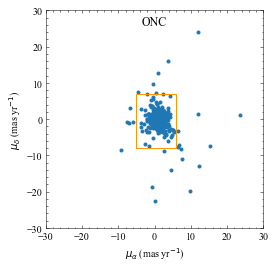

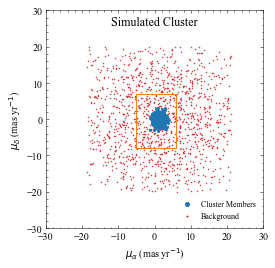

In [18]:
import matplotlib
matplotlib.style.use('science')


pmra = gaiaConfTab['pmra']
pmdec = gaiaConfTab['pmdec']

simTab = Table.read('c:\\users\\sahal\\2018trinarywork\\trinarystarsearch\\data\\syntheticdata\\fake2.fits')
pmrasim = simTab['PMRA']
pmdecsim = simTab['PMDEC']

plt.plot(pmra, pmdec,'.')
plt.xlabel('$\\mu_ \\alpha$ (mas yr$^{-1}$)')
plt.ylabel('$\\mu_ \\delta$ (mas yr$^{-1}$)' ) 
plt.title('ONC', pad = -15)
plt.plot([-5,-5, 6,6, -5],[-8, 7, 7, -8, -8])
plt.xlim(-30, 30)
plt.ylim(-30, 30)
# plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')
# plt.savefig('c:\\users\\sahal\\desktop\\research\\figures\\obsPM.pdf',bbox_inches='tight')
plt.show()

yso = simTab['YSO']
yso0 = np.where(yso==0.0)[0]
yso1 = np.where(yso==1.0)[0]
a, = plt.plot(pmrasim[yso0], pmdecsim[yso0], '.', color =  u'#d62728', markersize = 1, label = 'Background')
b, = plt.plot(pmrasim[yso1], pmdecsim[yso1], '.', color = u'#1f77b4', markersize = 4, label = 'Cluster Members')

plt.xlabel('$\\mu_ \\alpha$ (mas yr$^{-1}$)')
plt.ylabel('$\\mu_ \\delta$ (mas yr$^{-1}$)' ) 
plt.title('Simulated Cluster', pad = -15)
plt.plot([-5,-5, 6,6, -5],[-8, 7, 7, -8, -8], color = u'#ff7f0e')
plt.xlim(-30, 30)
plt.ylim(-30, 30)
# plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(handles = [b,a], prop={'size': 8}, loc = 'lower right', markerscale = 2)
# plt.savefig('c:\\users\\sahal\\desktop\\research\\figures\\simPM.pdf', bbox_inches='tight')
plt.show()

In [15]:
simTab

RA,DEC,PMRA,PMDEC,PARALLAX,RV,ABSG,ABSH,BP_RP,YSO
float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
81.86608123779297,-6.966591835021973,-8.082101,13.362783,3.3093011,5.92276,10.918929,7.689041,2.8956459,0.0
82.14733123779297,-7.211617469787598,2.0644698,7.4351296,2.7763712,24.348978,10.220535,7.172103,2.6644685,0.0
85.75260925292969,-6.3789753913879395,-10.151399,-2.4022624,3.0284865,31.351921,2.9839363,2.1387806,0.5125402,0.0
83.40093994140625,-6.223512649536133,8.881024,1.379571,2.0166237,28.65843,2.534236,1.780757,0.4614983,0.0
82.70307159423828,-7.365639686584473,-7.6700854,-0.96560913,2.02997,1.5617256,3.3758545,2.263874,0.67016435,0.0
83.36608123779297,-4.490049839019775,1.4723719,-1.5494297,3.0898333,29.775173,3.4558353,2.6271753,0.50540686,0.0
81.90626525878906,-5.334844589233398,8.746767,12.035002,2.670317,13.131371,4.1665416,3.0016055,0.69723356,0.0
83.91648864746094,-4.801501274108887,-1.7697679,18.896667,2.8962975,7.8214383,3.5105476,2.6459064,0.5285485,0.0
82.14360809326172,-7.394248008728027,-16.46776,16.364513,2.417946,5.5113716,3.9109945,2.8123655,0.6622715,0.0


In [15]:
f = Table(fits.open('c:/users/sahal/desktop/Revised figures/PMtab.fits')[1].data)

In [ ]:
from astropy.coordinates import SkyCoord
